## Load data

In [1]:
import csv

class Repository(object):
    def __init__(self,fileName):
        self.fileName = fileName
    def  loadData(self,inputColumnFst,inputColumnSnd,outputColumn,):
        data=[]
        columns=[]
        file = open(self.fileName)
        parsedData = csv.reader(file,delimiter=',')
       
        noLines = 0
        for line in parsedData:
            if noLines == 0:
                columns = line
            else:
                data.append(line)
            noLines += 1
        
        
        inputColumnIndexFst = columns.index(inputColumnFst)
        inputColumnIndexSnd = columns.index(inputColumnSnd)
        outputColumnIndex = columns.index(outputColumn)
    
        inputDataFst = []
        inputDataSnd = []
        outputData = []
        for j in range(len(data)):
            inputDataFst.append(float(data[j][inputColumnIndexFst]))
            inputDataSnd.append(float(data[j][inputColumnIndexSnd]))
            outputData.append(float(data[j][outputColumnIndex]))
        
        file.close()
        
        return inputDataFst,inputDataSnd,outputData

In [2]:
filename = "data.csv"
repository = Repository(filename)
inputColumnFst = 'Economy..GDP.per.Capita.'
inputColumnSnd = 'Freedom'

outputColumn = 'Happiness.Score'
inputDataResultFst,inputDataResultSnd,outputDataResult = repository.loadData(inputColumnFst,inputColumnSnd, outputColumn)
print('inputs for column '+inputColumnFst +' is: \n'+str(inputDataResultFst)+'\n')
print('inputs for column '+inputColumnSnd +' is: \n'+str(inputDataResultSnd)+'\n')
print('outputs for column '+outputColumn +' is: \n'+str(outputDataResult)+'\n')

inputs for column Economy..GDP.per.Capita. is: 
[1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327, 1.50394463539124, 1.47920441627502, 1.40570604801178, 1.49438726902008, 1.484414935112, 1.37538242340088, 1.10970628261566, 1.48709726333618, 1.54625928401947, 1.53570663928986, 1.48792338371277, 1.46378076076508, 1.74194359779358, 1.44163393974304, 1.25278460979462, 1.62634336948395, 1.10735321044922, 1.35268235206604, 1.18529546260834, 1.15318381786346, 1.69227766990662, 1.34327983856201, 1.21755969524384, 0.872001945972443, 1.23374843597412, 1.43092346191406, 1.12786877155304, 1.43362653255463, 1.38439786434174, 1.87076568603516, 1.07062232494354, 1.53062355518341, 1.36135590076447, 1.63295245170593, 1.32539355754852, 1.48841226100922, 1.29121541976929, 0.737299203872681, 1.00082039833069, 0.909784495830536, 1.29178786277771, 0.786441087722778, 1.39506661891937, 1.28177809715271, 0.907975316047668, 1.41691517829895, 1.31458234786987, 1.091864466667

### defining function for plotting the inputData and the outputData

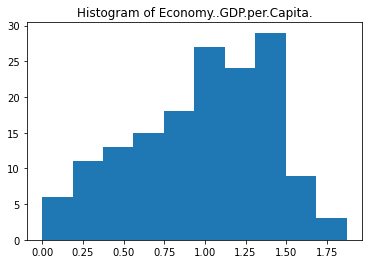

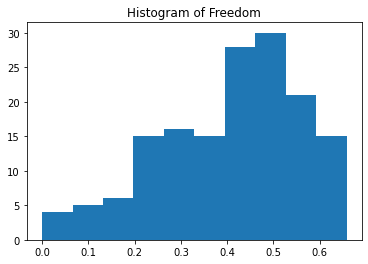

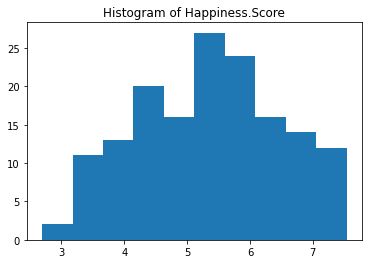

In [3]:
import matplotlib.pyplot as plt 

def plotDataHistogram(x, columnName):
    plt.hist(x, 10)
    plt.title('Histogram of ' + columnName)
    plt.show()
    
plotDataHistogram(inputDataResultFst,inputColumnFst)
plotDataHistogram(inputDataResultSnd,inputColumnSnd)
plotDataHistogram(outputDataResult,outputColumn)

### defining plotting for the training data inputs

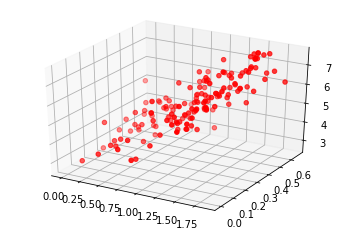

In [4]:
import numpy as np

fig = plt.figure()
ax = plt.axes(projection="3d")



z_points = np.array(outputDataResult)
x_points = np.array(inputDataResultFst)
y_points = np.array(inputDataResultSnd) 
ax.scatter(x_points, y_points, z_points, color="r")

plt.show()

### separating training data from test data 20%-80%

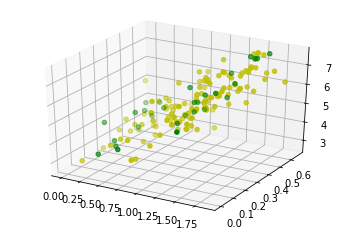

In [5]:
import numpy as np 
import math

np.random.seed(5)

# generate the positions of the data that will be a part of the test data
noTestDataIndexes = math.floor( 0.2 * len(inputDataResultFst))
testDataIndexes = []
for index in range(0,noTestDataIndexes):
    testDataIndexes.append(np.random.randint(0,len(inputDataResultFst)))

inputTestFst = []
inputTestSnd = []
outputTest = []
inputTrainingFst = []
inputTrainingSnd = []
outputTraining = []
for i in range (0,len(inputDataResultFst)):
    if i in testDataIndexes :
        inputTestFst.append(inputDataResultFst[i])
        inputTestSnd.append(inputDataResultSnd[i])
        outputTest.append(outputDataResult[i])
    else:
        inputTrainingFst.append(inputDataResultFst[i])
        inputTrainingSnd.append(inputDataResultSnd[i])
        outputTraining.append(outputDataResult[i])

# plotting differently the training and the test data 
import numpy as np

fig = plt.figure()
ax = plt.axes(projection="3d")



z_points_test = np.array(outputTest)
x_points_test = np.array(inputTestFst)
y_points_test = np.array(inputTestSnd) 
ax.scatter(x_points_test, y_points_test, z_points_test, color="g")

z_points_training = np.array(outputTraining)
x_points_training = np.array(inputTrainingFst)
y_points_training = np.array(inputTrainingSnd) 
ax.scatter(x_points_training, y_points_training, z_points_training, color="y")

plt.show()

    **Multivariate linear-regression using BatchGD (class)**

In [6]:
import random
class BGD(object):
    def __init__(self):
        self.w0 = 0.0
        self.w = []
        
    
    def calculateGuess(self,inputsRow):
        # getting the value of wo in the guess
        guess = self.w[-1]
        for feature in range(len(inputsRow)):
            guess += self.w[feature] * inputsRow[feature]
        return guess
    
    def calculateError(self,inputs,outputs):
        sum = 0.0
        noSamples = len(inputs)
        for inp in range(len(inputs)):
            guess = self.calculateGuess(inputs[inp])
            sum += guess - outputs[inp]
        return 1/noSamples * sum
        
    def computeGrad0PerEpoch(self,inputs,outputs):
        sum = 0
        noSamples = len(inputs)
        for samp in range(0,noSamples):
            guess = self.calculateGuess(inputs[samp])
            sum += guess - outputs[samp]
        return 1.0/noSamples * sum
    def computeGradsPerEpoch(self,inputs,outputs,noCoef):
        sum = 0
        noSamples = len(inputs)
        for samp in range(0,noSamples):
            guess = self.calculateGuess(inputs[samp])
            sum += inputs[samp][noCoef] * (guess- outputs[samp])
        return 1.0/noSamples * sum
    def fit(self,inputs,outputs,learningRate = 0.001,noEpochs = 1000):
        noOfFeatures = len(inputs[0])+1
        for _ in range(noOfFeatures):
            self.w.append(0.0)
        # for _ in range(noOfFeatures):
            # self.w.append(random.random())
        for epoch in range(noEpochs):
            for noCoef in range(0,len(inputs[0])):
                self.w[noCoef] = self.w[noCoef] - learningRate * self.computeGradsPerEpoch(inputs,outputs,noCoef)
            self.w[len(inputs[0])] = self.w[len(inputs[0])] - learningRate * self.computeGrad0PerEpoch(inputs,outputs)
        self.w0 = self.w[-1]
        self.w = self.w[:-1]
    
    def predict(self,inputs):
        outputsComputed = []
        for i in range(0,len(inputs)):
            outputsComputed.append(self.calculateGuess(inputs[i]))
        return outputsComputed

**Linear regression solve**

In [7]:
from sklearn.preprocessing import normalize

linearRegressor = BGD()
inputsTraining = []
for i in range(0,len(inputTrainingFst)):
    inputsTraining.append([inputTrainingFst[i],inputTrainingSnd[i]])
normalize(inputsTraining,copy=False)
linearRegressor.fit(inputsTraining,outputTraining,0.15,3300)

print('The result function of linear regression LS is:\n')
print('f(x) = '+str(linearRegressor.w0)+' + '+str(linearRegressor.w[0])+' * x1 + '+str(linearRegressor.w[1])+' * x2')

w0 = linearRegressor.w0
w1 = linearRegressor.w[0]
w2 = linearRegressor.w[1]

The result function of linear regression LS is:

f(x) = 2.4793756589725957 + 1.9154352713163965 * x1 + 2.3512007601639904 * x2


**plotting the learnt model**


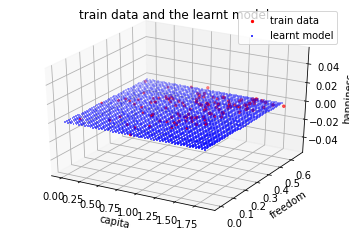

In [8]:
def plot3Ddata(x1Train, x2Train, yTrain, x1Model = None, x2Model = None, yModel = None, x1Test = None, x2Test = None, yTest = None, title = None):
    from mpl_toolkits import mplot3d
    ax = plt.axes(projection = '3d')
    if (x1Train):
        plt.scatter(x1Train, x2Train, yTrain, c = 'r', marker = 'o', label = 'train data') 
    if (x1Model):
        plt.scatter(x1Model, x2Model, yModel, c = 'b', marker = '_', label = 'learnt model') 
    if (x1Test):
        plt.scatter(x1Test, x2Test, yTest, c = 'g', marker = '^', label = 'test data')  
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

noOfPoints = 50
xref1 = []
val = min(inputTrainingFst)
step1 = (max(inputTrainingFst) - min(inputTrainingFst)) / noOfPoints
for _ in range(1, noOfPoints):
    for _ in range(1, noOfPoints):
        xref1.append(val)
    val += step1

xref2 = []
val = min(inputTrainingSnd)
step2 = (max(inputTrainingSnd) - min(inputTrainingSnd)) / noOfPoints
for _ in range(1, noOfPoints):
    aux = val
    for _ in range(1, noOfPoints):
        xref2.append(aux)
        aux += step2
yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
plot3Ddata(inputTrainingFst, inputTrainingSnd, outputTraining, xref1, xref2, yref, [], [], [], 'train data and the learnt model')


**test the lernt mdoel**

29
29


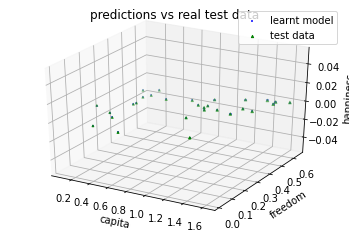

In [9]:
inputsTest = []
for i in range(0,len(inputTestFst)):
    inputsTest.append([inputTestFst[i],inputTestSnd[i]])
normalize(inputsTest,copy=False)

computedTestOutputs = linearRegressor.predict(inputsTest)
print(len(computedTestOutputs))
print(len(inputTestFst))

plot3Ddata([], [], [], inputTestFst, inputTestSnd, computedTestOutputs, inputTestFst, inputTestSnd, computedTestOutputs, 'predictions vs real test data')


### error calculation

In [10]:
from sklearn.metrics import mean_squared_error


error =sum((r - c) ** 2 for r, c in zip(outputTest, computedTestOutputs)) / len(outputTest)
errorTool = mean_squared_error(outputTest, computedTestOutputs)

print('prediction error ', error)
print('prediction error (tool):  ', errorTool)

prediction error  0.28603292084926685
prediction error (tool):   0.2860329208492668
